<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/dowload_video_from_youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pytube

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.3 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

from glob import glob

import IPython.display as ipd
from tqdm import tqdm

import subprocess
from pytube import YouTube
plt.style.use('ggplot')

In [21]:
def downloadYouTube(videourl, path):

    yt = YouTube(videourl)
    yt = yt.streams.filter(progressive=True, file_extension='mp4').order_by('resolution').desc().first()
    if not os.path.exists(path):
        os.makedirs(path)
    yt.download(path)

downloadYouTube('https://www.youtube.com/watch?v=8oZKujt-v88', os.getcwd())

In [22]:
!ls -GFlash --color

total 37M
4.0K drwxr-xr-x 1 root 4.0K Sep 20 19:33  ./
4.0K drwxr-xr-x 1 root 4.0K Sep 20 19:11  ../
4.0K drwxr-xr-x 4 root 4.0K Sep 19 13:43  .config/
944K -rw-r--r-- 1 root 942K Sep 20 19:24 'Funny Hampter.3gpp'
 18M -rw-r--r-- 1 root  18M Sep 20 19:33 'Funny Hampter.mp4'
 18M -rw-r--r-- 1 root  18M Sep 20 19:25  Funny_Hampter.mp4
4.0K drwxr-xr-x 2 root 4.0K Sep 20 19:29  .ipynb_checkpoints/
4.0K drwxr-xr-x 1 root 4.0K Sep 19 13:44  sample_data/


In [23]:
from IPython.display import Video
Video("/content/Funny_Hampter.mp4", width=700)

In [24]:
# Load in video capture
cap = cv2.VideoCapture('/content/Funny_Hampter.mp4')

In [26]:
# Total number of frames in video
cap.get(cv2.CAP_PROP_FRAME_COUNT)

3005.0

In [28]:
# Video height and width
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(f'Height {height}, Width {width}')

Height 720.0, Width 1280.0


In [29]:
# Get frames per second
fps = cap.get(cv2.CAP_PROP_FPS)
print(f'FPS : {fps:0.2f}')

FPS : 30.00


In [30]:
cap.release()

In [31]:
cap = cv2.VideoCapture('/content/Funny_Hampter.mp4')
ret, img = cap.read()
print(f'Returned {ret} and img of shape {img.shape}')

Returned True and img of shape (720, 1280, 3)


In [32]:
## Helper function for plotting opencv images in notebook
def display_cv2_img(img, figsize=(10, 10)):
    img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img_)
    ax.axis("off")

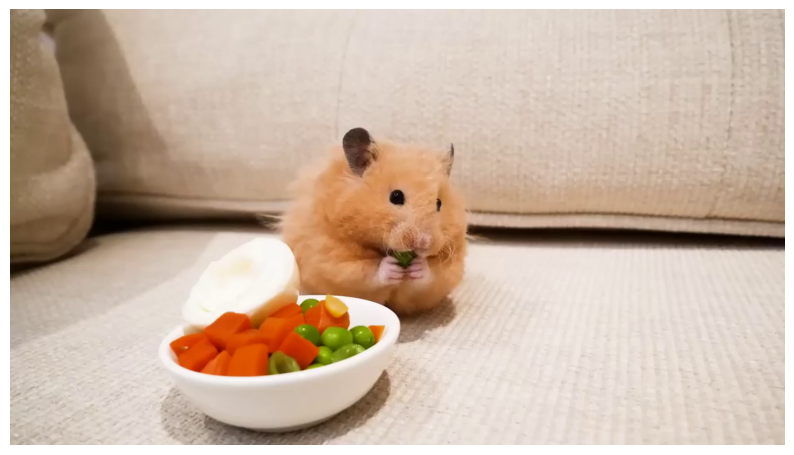

In [33]:
display_cv2_img(img)

In [34]:
cap.release()

IndexError: ignored

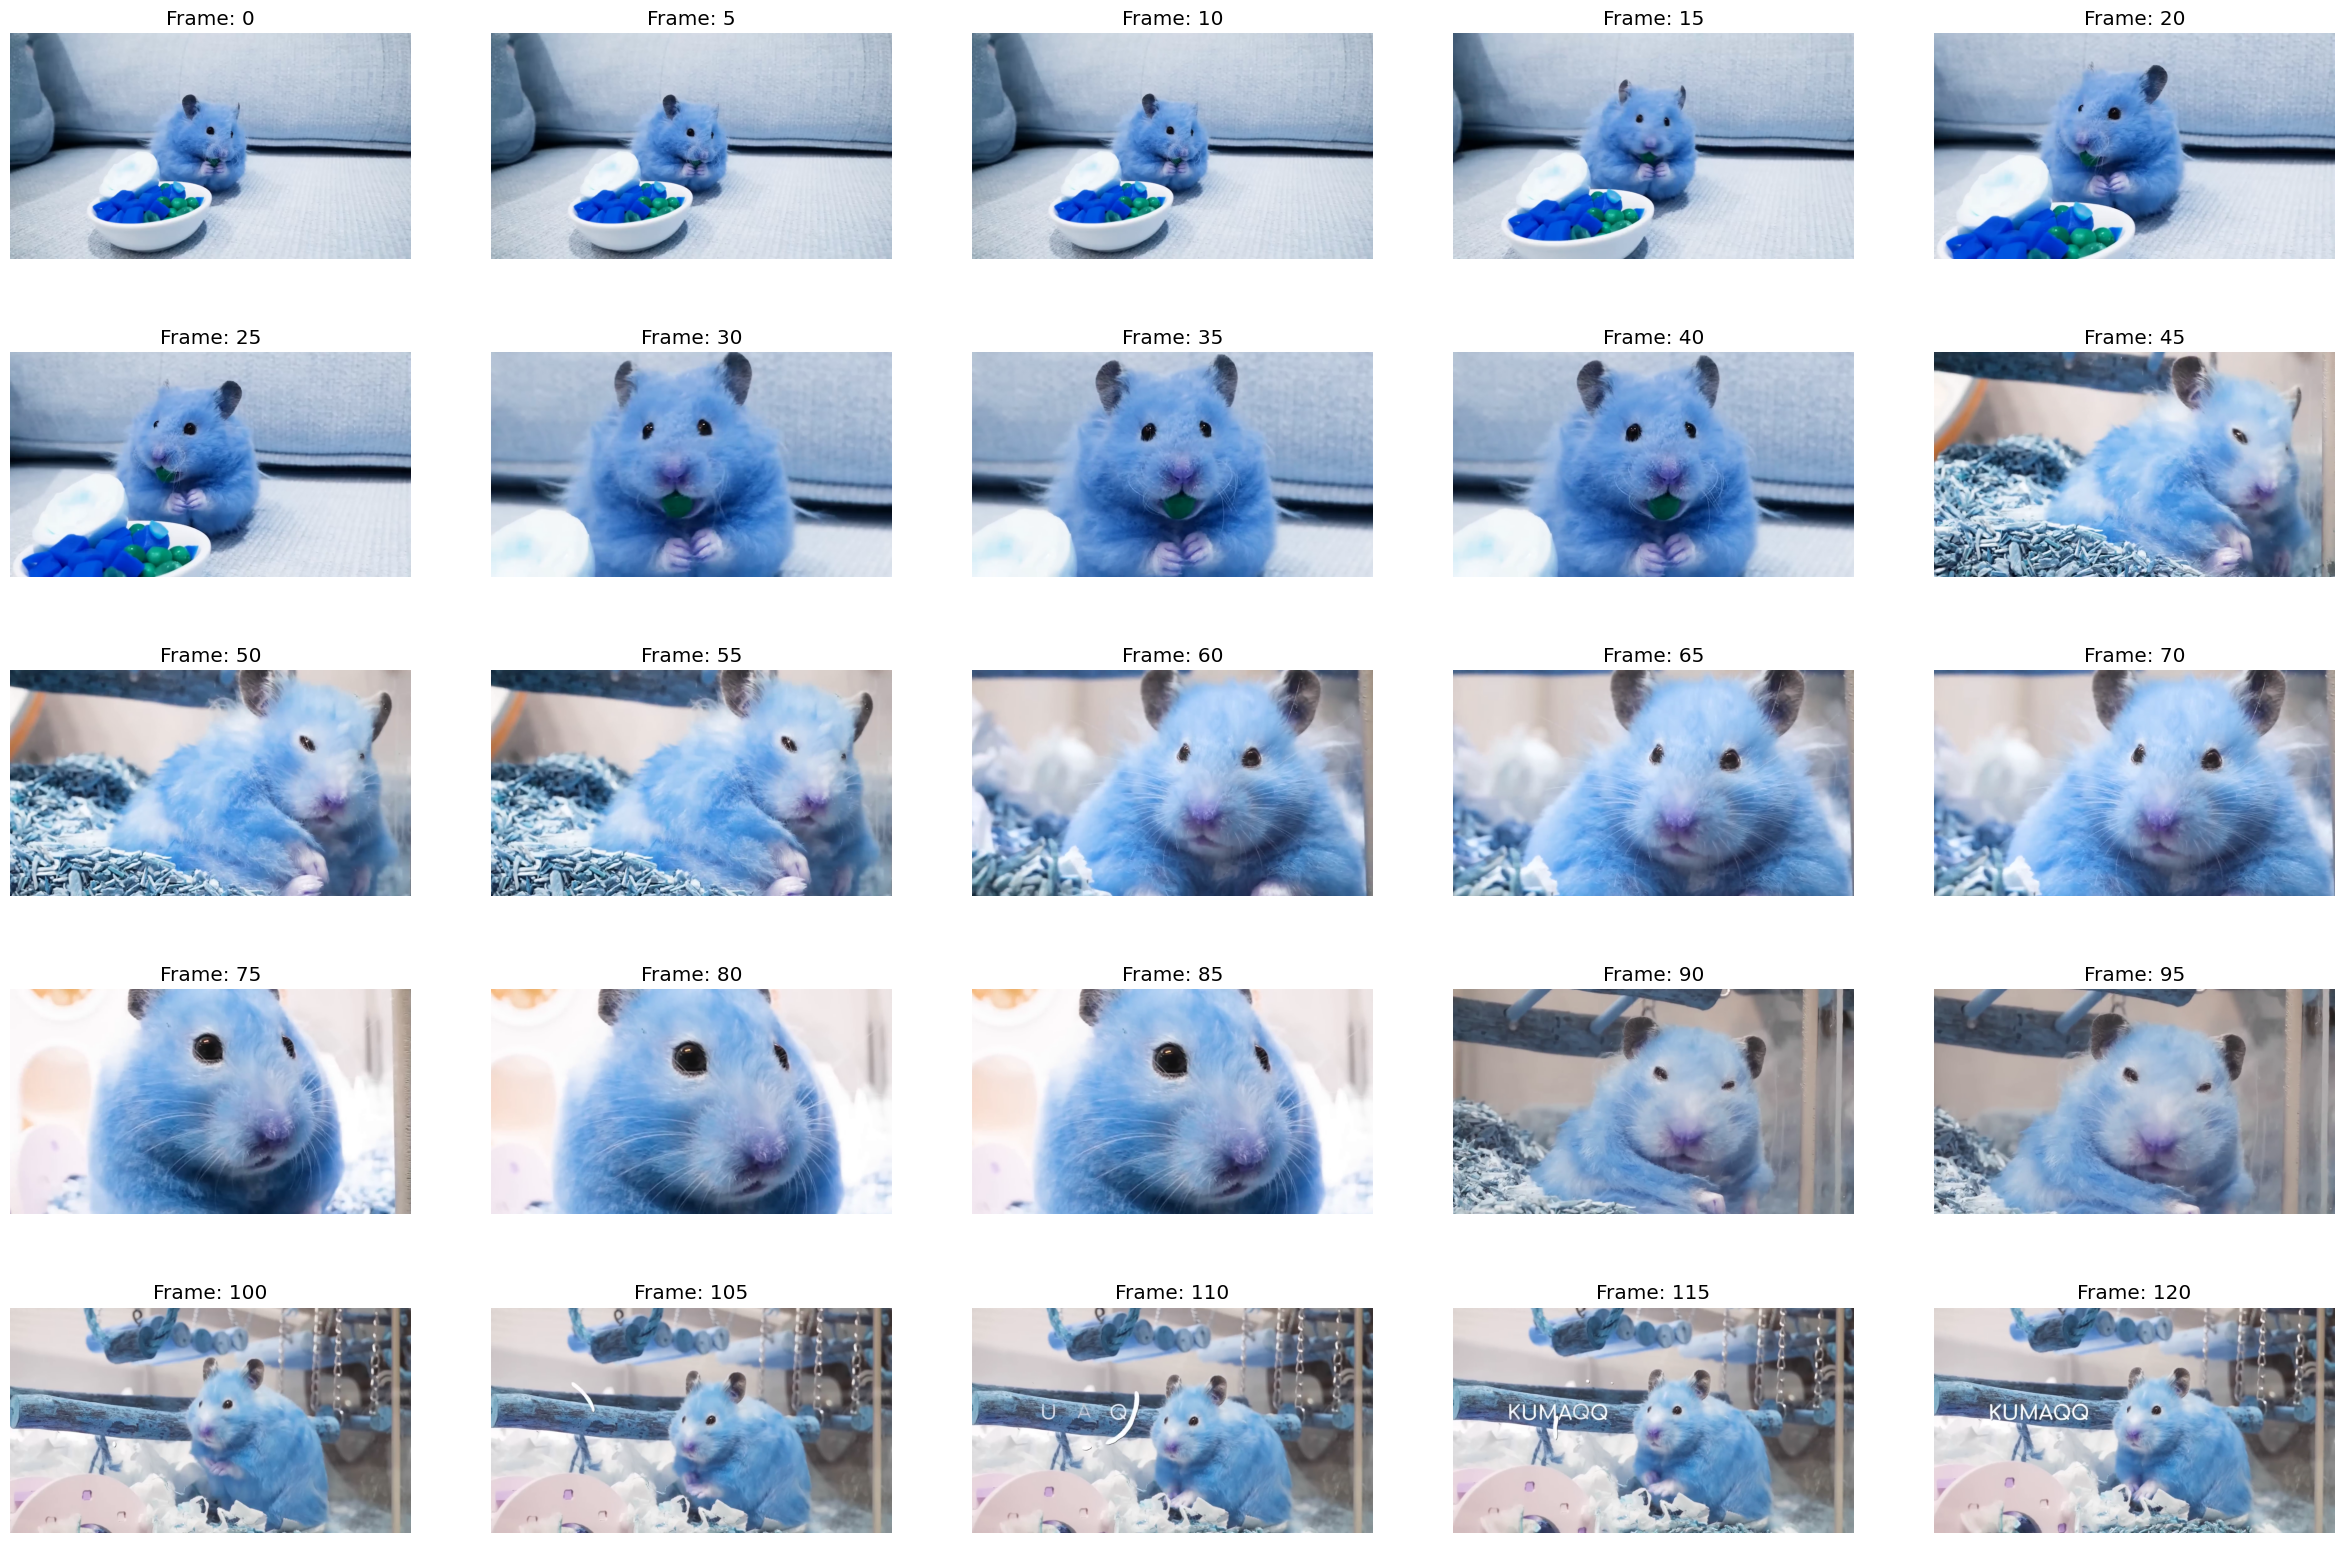

In [38]:
fig, axs = plt.subplots(5, 5, figsize=(30, 20))
axs = axs.flatten()

cap = cv2.VideoCapture("/content/Funny_Hampter.mp4")
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    if frame % 5 == 0:
        axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[img_idx].set_title(f'Frame: {frame}')
        axs[img_idx].axis('off')
        img_idx += 1

plt.tight_layout()
plt.show()
cap.release()